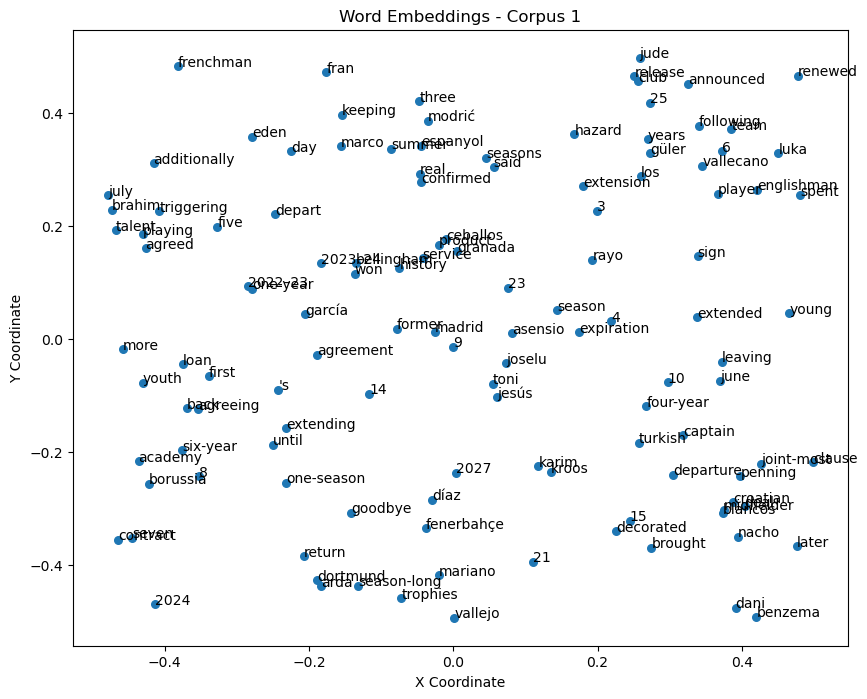

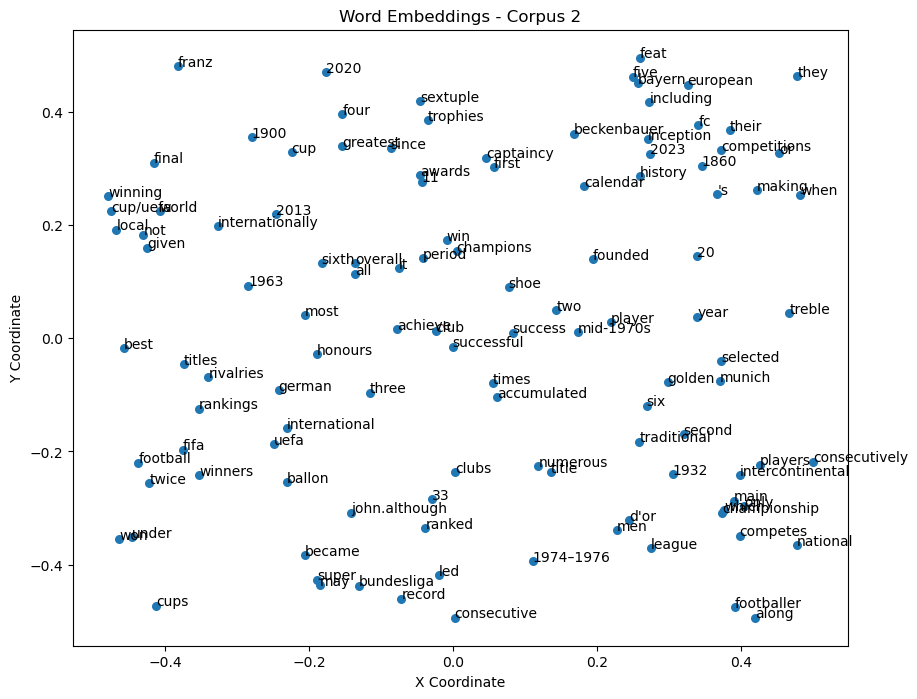


Word Embeddings - Corpus 1:
madrid: [-0.02594432  0.01287258]
club: [0.25614613 0.45545807]
contract: [-0.46442956 -0.3547031 ]
announced: [0.32501945 0.45088693]
until: [-0.2503427  -0.18693393]
june: [ 0.3703823  -0.07365274]
day: [-0.22459723  0.33156297]
's: [-0.242599   -0.08978655]
season: [0.14427228 0.05103089]
2024: [-0.41323376 -0.46882755]
player: [0.36687014 0.25629598]
extended: [0.33826095 0.03862868]
captain: [ 0.31816632 -0.1695368 ]
real: [-0.04591851  0.29188496]
six-year: [-0.3759799  -0.19614981]
loan: [-0.3750314 -0.0445052]
later: [ 0.4768738 -0.3657844]
14: [-0.11644728 -0.09691901]
deal: [ 0.4038684 -0.2959272]
2027: [ 0.00328662 -0.2361525 ]
july: [-0.47846276  0.25375852]
academy: [-0.43651196 -0.21590237]
9: [-0.00090404 -0.0139612 ]
frenchman: [-0.38236746  0.48231223]
release: [0.2512399  0.46447694]
triggering: [-0.407496   0.2256925]
garcía: [-0.205217    0.04380488]
joint-most: [ 0.42628452 -0.22049588]
decorated: [ 0.22587502 -0.33934802]
fran: [-0.176

In [23]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score

# Function for text preprocessing
def text_preprocessing(text, punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_“~''', stop_words=None):
    tokenized_text = []
    for sentence in text:
        # Tokenize the sentence
        tokens = word_tokenize(sentence.lower())

        # Remove punctuation and stop words
        tokens = [token for token in tokens if token not in punctuations and token not in stop_words]

        tokenized_text.append(tokens)
    
    return tokenized_text

# Two Example Corpora
corpus1 = [  "On 3 June, at the end of the 2022–23 season",
           "Madrid announced the departure of Marco Asensio due to the expiration of his contract",
           "with the player having spent seven seasons playing for Los Blancos",
          "On the same day, the club said goodbye to Mariano and Eden Hazard",
           "The following day, Madrid announced an agreement with Karim Benzema for the club captain to depart in the summer after 14 years of service",
           "with the Frenchman leaving the club as the joint-most decorated player in Real's history",
           "having won 25 trophies.[4] On 9 June, Madrid confirmed the return of the former club's academy player",
           "Fran García, triggering the release clause to sign him from Rayo Vallecano on a four-year contract",
           "The next day, Madrid announced that Brahim Díaz will be part of the first team for the 2023–24 season",
           "additionally extending his contract until 2027",
           " On 14 June, Madrid announced the signing of young midfielder Jude Bellingham from Borussia Dortmund",
           "penning a six-year deal with the Englishman",
            "Five days later, Madrid brought back another club's youth academy product",
           "signing Joselu on a one-year loan from Espanyol.[8] On 21 June", 
           "Toni Kroos renewed his contract with the club until 2024.[9] The next day", 
           "Madrid announced that the club's new captain, Nacho",
           "had extended his contract for one more season",
           "keeping him at Real until 2024.[10] On 23 June, Dani Ceballos extended until 2027",
            "Three days later, Madrid and Luka Modrić agreed on a one-season extension", 
            "with the Croatian signing a contract until 2024",
          " On 6 July, Madrid announced the signing of Arda Güler from Fenerbahçe", 
            "agreeing a six-year deal with the Turkish talent",
            " On 15 July, Jesús Vallejo joined Granada on a season-long loan"]

corpus2 = [
    "Bayern is the most successful club in German football history",
"having won a record 33 national titles",
"including 11 consecutively since 2013", 
"and 20 national cups, along with numerous European honours",
"FC Bayern Munich was founded in 1900 by 11 football players",
"led by Franz John.Although Bayern won its first national championship in 1932",
"the club was not selected for the Bundesliga at its inception in 1963",
"The club had its period of greatest success in the mid-1970s when",
"under the captaincy of Franz Beckenbauer",
"they won the European Cup three consecutive times (1974–1976)",
"Overall, Bayern have won six European Cup/UEFA Champions League titles (a German record)",
"winning their sixth title in the 2020 final as part of the Treble", 
"after which it became the second European club to achieve the feat twice.",
"Bayern has also won one UEFA Cup, one European Cup Winners' Cup",
"two UEFA Super Cups, two FIFA Club World Cups and two Intercontinental Cups", 
"making it one of the most successful European clubs internationally",
"and the only German club to have won both international titles",
"Bayern players have accumulated five Ballon d'Or awards", 
"two The Best FIFA Men's Player awards, four European Golden Shoe and three UEFA Men's Player of the Year awards",
"including UEFA Club Footballer of the Year",
"By winning the 2020 FIFA Club World Cup",
"Bayern Munich became only the second club to win the sextuple or all trophies that a club competes for in a given calendar year", 
"Bayern Munich are one of five clubs to have won all three of UEFA's main club competitions", 
"the only German club to achieve that", 
"As of May 2023, Bayern Munich are ranked second in UEFA club rankings",
"The club has traditional local rivalries with 1860 Munich"
]

# Define stop words and punctuations
stop_words = ['and', 'a','due','end', 'is', 'ler', 'another','same','jes', 'joined','new', 'next', 'one','signing','sixyear','oneyear','part','after','days','fouryear','had', 'having' , 'him', 'his','the', 'in', 'be', 'will', 'was', 'but', 'this', 'were', 'with', 'of', 'also','an','on', '.', 'for', 'any', 'its', 'and', 'are', 'from', 'both', 'as','by','that','has','can','of','to','have','such','f1','into','at','rnns']
punctuations = r'''!()-[]{};:'"\,<>./?@#$%^&*_“~'''

# Preprocess the corpus
tokenized_corpus1 = text_preprocessing(corpus1, punctuations=punctuations, stop_words=stop_words)
tokenized_corpus2 = text_preprocessing(corpus2, punctuations=punctuations, stop_words=stop_words)

# Train Word2Vec models for each corpus
model1 = Word2Vec(sentences=tokenized_corpus1, vector_size=2, window=5, min_count=1, workers=4)
model2 = Word2Vec(sentences=tokenized_corpus2, vector_size=2, window=5, min_count=1, workers=4)

# Function to plot word embeddings without PCA
def plot_word_embeddings(model, title):
    words = list(model.wv.index_to_key)
    word_embeddings = [model.wv[word] for word in words]

    # Extract x and y coordinates directly from the embeddings
    x_coords = [embedding[0] for embedding in word_embeddings]
    y_coords = [embedding[1] for embedding in word_embeddings]
    
    plt.figure(figsize=(10, 8))
    plt.scatter(x_coords, y_coords, s=30, marker='o')
    for i, word in enumerate(words):
        plt.annotate(word, xy=(x_coords[i], y_coords[i]))
        
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(title)
    plt.show()
word1 = list(model1.wv.index_to_key)
word2 = list(model2.wv.index_to_key)

# Plot word embeddings for each corpus
plot_word_embeddings(model1, title='Word Embeddings - Corpus 1')
plot_word_embeddings(model2, title='Word Embeddings - Corpus 2')

# Print word embeddings and their corresponding words for each model
print("\nWord Embeddings - Corpus 1:")
for word, embedding in zip(model1.wv.index_to_key, model1.wv.vectors):
    print(f"{word}: {embedding}")

print("\nWord Embeddings - Corpus 2:")
for word, embedding in zip(model2.wv.index_to_key, model2.wv.vectors):
    print(f"{word}: {embedding}")

words1 = list(model1.wv.index_to_key)
word_embeddings1 = [model1.wv[word] for word in words1]
words2 = list(model2.wv.index_to_key)
word_embeddings2 = [model2.wv[word] for word in words2]
cosine_similarities=cosine_similarity(word_embeddings1,word_embeddings2)
print(cosine_similarities)
euclidian_similarities= euclidean_distances(word_embeddings1,word_embeddings2)
print(euclidian_similarities)




In [24]:
import numpy as np
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import euclidean_distances

# Get word embeddings and words for each model
words1 = list(model1.wv.index_to_key)
word_embeddings1 = [model1.wv[word] for word in words1]
words2 = list(model2.wv.index_to_key)
word_embeddings2 = [model2.wv[word] for word in words2]

# Function to calculate Jaccard similarity between two sets
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Function to calculate Jaccard similarity between two word embeddings
def jaccard_similarity_measure(vec1, vec2):
    set1 = set(np.nonzero(vec1)[0])  # Indices of non-zero elements in vec1
    set2 = set(np.nonzero(vec2)[0])  # Indices of non-zero elements in vec2
    return jaccard_similarity(set1, set2)

# Calculate Jaccard similarities between word embeddings
jaccard_similarities = np.zeros((len(words1), len(words2)))
for i, embedding1 in enumerate(word_embeddings1):
    for j, embedding2 in enumerate(word_embeddings2):
        jaccard_similarities[i, j] = jaccard_similarity_measure(embedding1, embedding2)


# Print Jaccard similarities
print("\nJaccard Similarities:")
print(jaccard_similarities)





Jaccard Similarities:
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


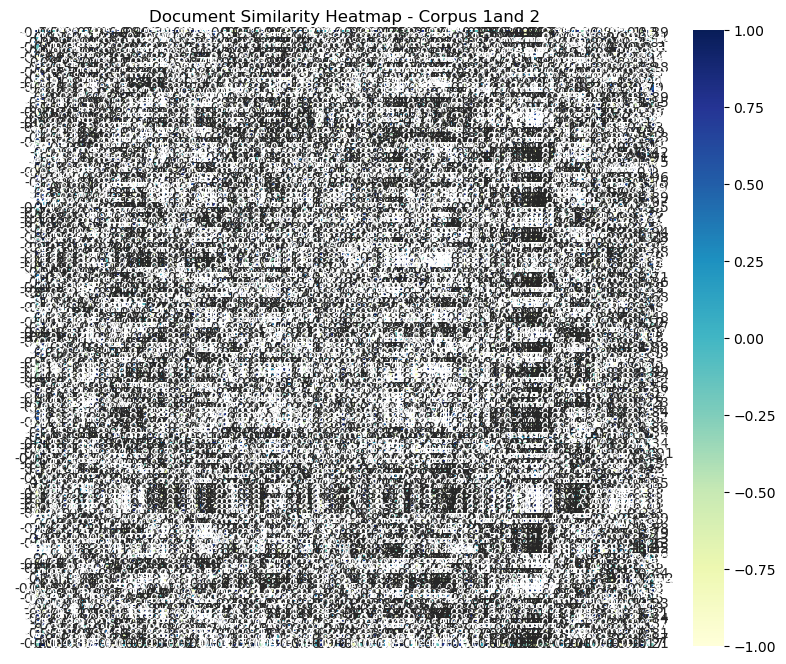

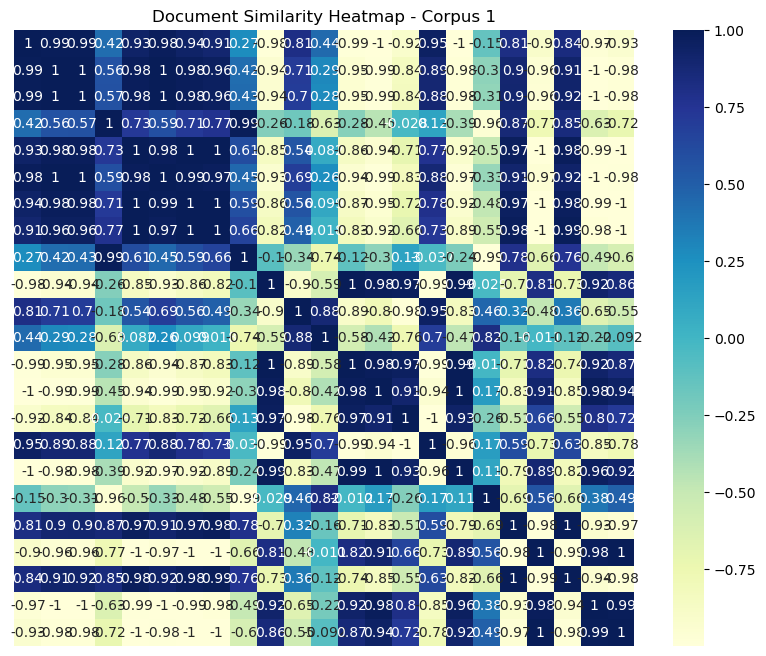

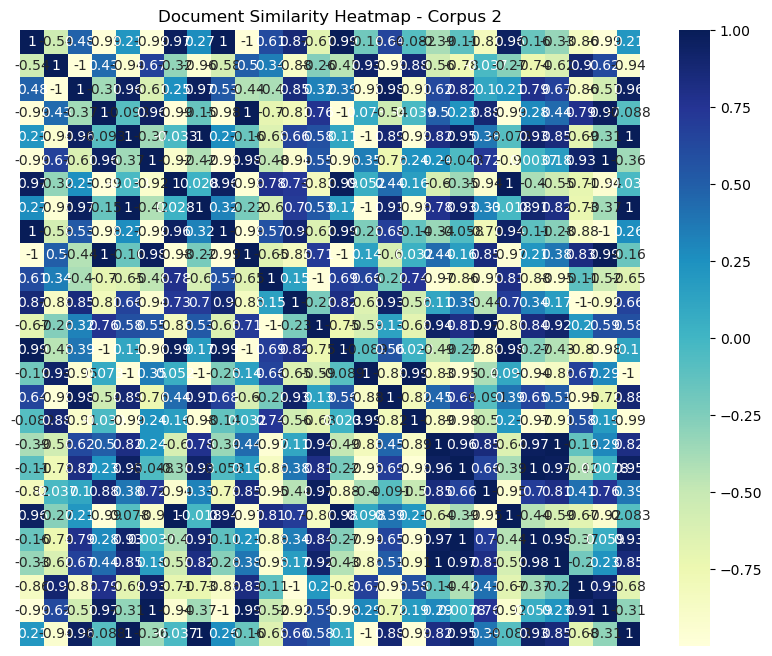

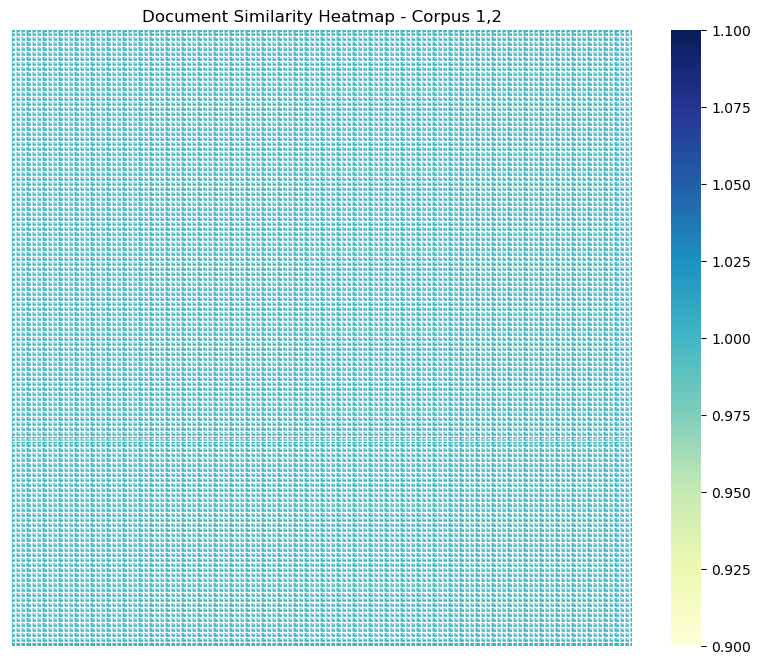

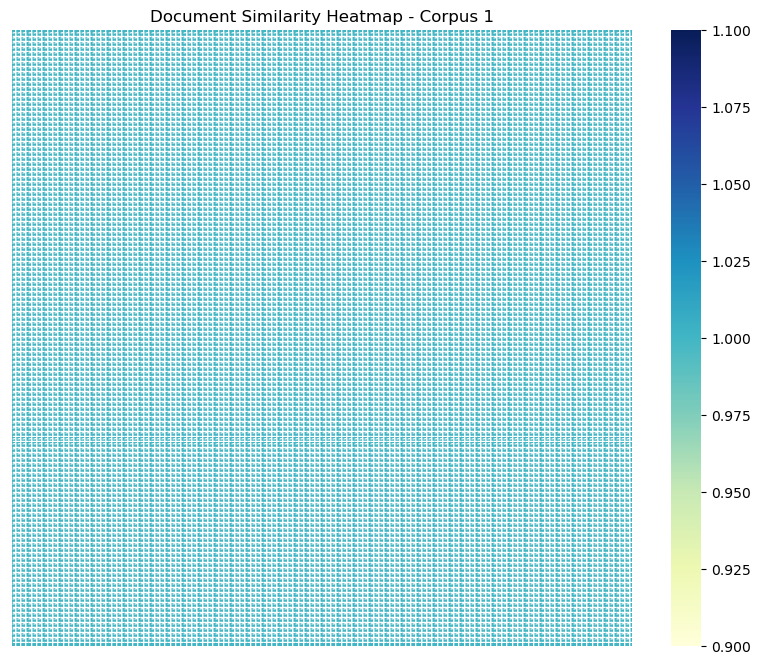

In [25]:
import seaborn as sns
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize


def calculate_similarity_matrix(model, tokenized_corpus):
    similarity_matrix = np.zeros((len(tokenized_corpus), len(tokenized_corpus)))

    for i in range(len(tokenized_corpus)):
        for j in range(len(tokenized_corpus)):
            vec1 = np.mean([model.wv[word] for word in tokenized_corpus[i] if word in model.wv], axis=0)
            vec2 = np.mean([model.wv[word] for word in tokenized_corpus[j] if word in model.wv], axis=0)
            similarity_matrix[i, j] = cosine_similarity([vec1], [vec2])[0][0]

    return similarity_matrix

# Calculate cosine similarity matrix for each corpus
similarity_matrix_corpus1 = calculate_similarity_matrix(model1, tokenized_corpus1)
similarity_matrix_corpus2 = calculate_similarity_matrix(model2, tokenized_corpus2)

# Function to visualize document similarities using a heatmap
def visualize_heatmap(cosine_similarities, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cosine_similarities, annot=True, cmap="YlGnBu", xticklabels=False, yticklabels=False)
    plt.title(title)
    plt.show()

# Visualize document similarities using heatmaps
visualize_heatmap(cosine_similarities, title='Document Similarity Heatmap - Corpus 1and 2')
#visualize_heatmap(similarity_matrix_corpus2, title='Document Similarity Heatmap - Corpus 2')
# Visualize document similarities using heatmaps
visualize_heatmap(similarity_matrix_corpus1, title='Document Similarity Heatmap - Corpus 1')
visualize_heatmap(similarity_matrix_corpus2, title='Document Similarity Heatmap - Corpus 2')
# Function to visualize document similarities using Multidimensional Scaling (MDS)
visualize_heatmap(jaccard_similarities,title='Document Similarity Heatmap - Corpus 1,2')
#visualize_heatmap(jaccard_similarities,title='Document Similarity Heatmap - Corpus 1')

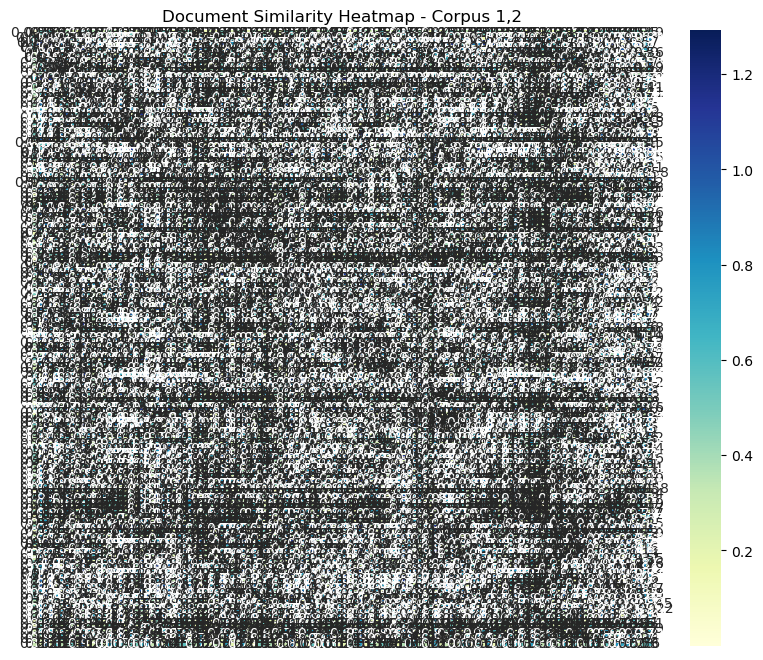

In [26]:
visualize_heatmap(euclidian_similarities,title='Document Similarity Heatmap - Corpus 1,2')

C:\ProgramData\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


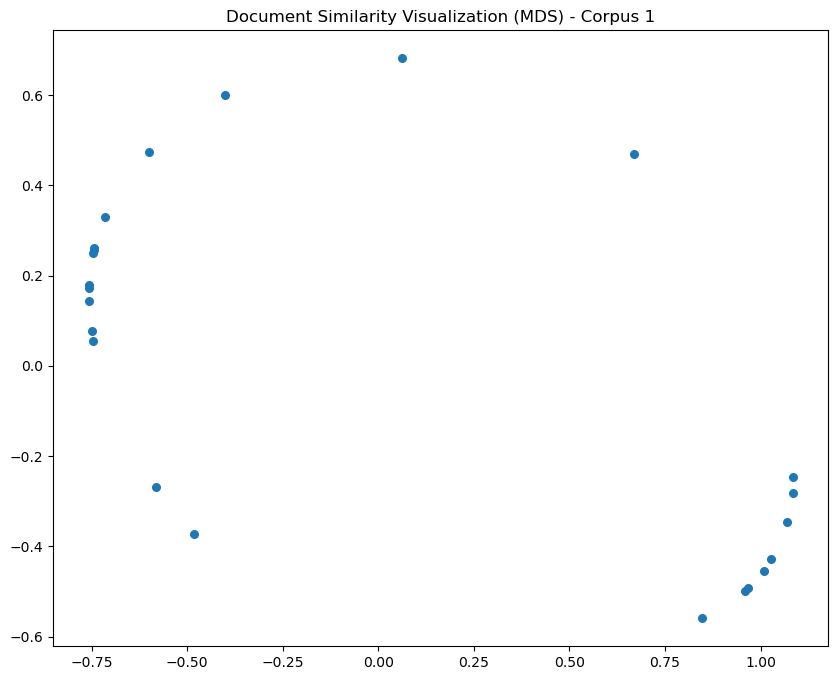

C:\ProgramData\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


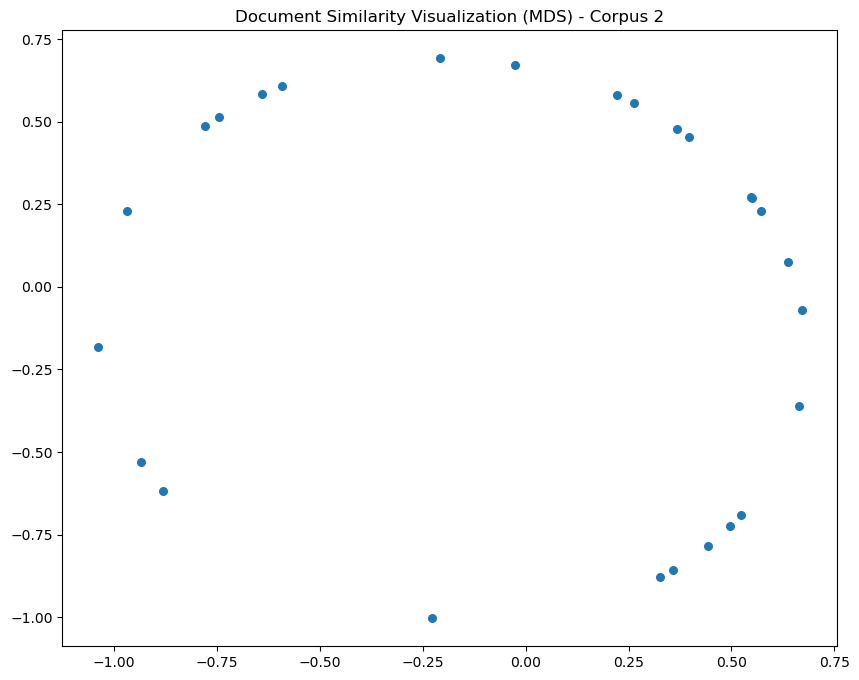

In [35]:
import seaborn as sns
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
# Function to visualize document similarities using Multidimensional Scaling (MDS)
def visualize_mds(similarity_matrix, title):
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
    results = mds.fit_transform(1 - similarity_matrix)

    plt.figure(figsize=(10, 8))
    plt.scatter(results[:, 0], results[:, 1], s=30, marker='o')
    
    plt.title(title)
    plt.show()

# Visualize document similarities using MDS

visualize_mds(similarity_matrix_corpus1, title='Document Similarity Visualization (MDS) - Corpus 1')
visualize_mds(similarity_matrix_corpus2, title='Document Similarity Visualization (MDS) - Corpus 2')


C:\ProgramData\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


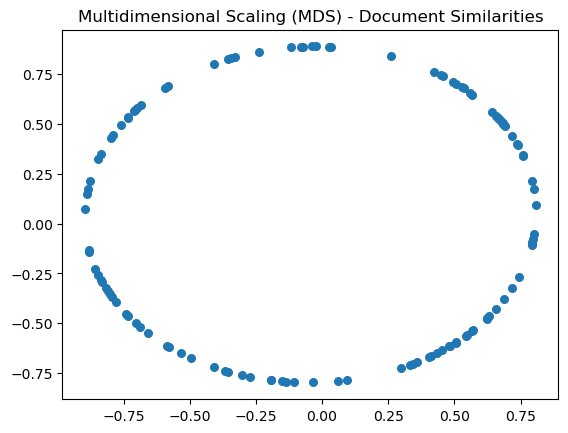

In [37]:
from sklearn.manifold import MDS

# Assuming 'cosine_similarities' is your cosine similarity matrix with shape (n_documents, n_documents)
n_documents = len(cosine_similarities)

# Ensure the matrix is square and symmetric
if cosine_similarities.shape[0] != cosine_similarities.shape[1]:
    # Make it square by selecting a square submatrix
    min_dim = min(cosine_similarities.shape[0], cosine_similarities.shape[1])
    cosine_similarities = cosine_similarities[:min_dim, :min_dim]

# Ensure the matrix is symmetric
cosine_similarities = 0.5 * (cosine_similarities + cosine_similarities.T)

# Reduce dimensionality to 2D using MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_result = mds.fit_transform(1 - cosine_similarities)

# Plot MDS result
plt.scatter(mds_result[:, 0], mds_result[:, 1], s=30, marker='o')

plt.title('Multidimensional Scaling (MDS) - Document Similarities')
plt.show()


In [33]:
print( len(cosine_similarities))

116
